
# Decision Trees



In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

Working of a Decision Tree
- You can start thinking by an if-else statement tree
- But how does the if-else condition are decided for such a tree? 
- Well, with help of statistical methods applied on the attributes
- After several iterations, once each attribute is covered, a decision tree is made
- Any further test case can then be used


In [3]:
from sklearn.tree import DecisionTreeClassifier

Types of Decision Tree based on Attribute selection methods:
- Information Gain
- Gain Ratio 
- Gini Index

In [4]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Cleaning the data

In [5]:
df.dropna(inplace=True)

In [ ]:
X= df.iloc[:,:-1].to_numpy()
y=df['Drug']

- Converting the the format from df to array
- Converting the labels

In [7]:
lesex=preprocessing.LabelEncoder()
lesex.fit(['F','M'])
X[:,1]=lesex.transform(X[:,1])

lebp=preprocessing.LabelEncoder()
lebp.fit(['LOW','HIGH','NORMAL'])
X[:,2]=lebp.transform(X[:,2])

lechol=preprocessing.LabelEncoder()
lechol.fit(['NORMAL','HIGH'])
X[:,3]=lechol.transform(X[:,3])

ley=preprocessing.LabelEncoder()
ley.fit(['drugA','drugB','drugC','drugY','drugX'])
y=ley.transform(y)

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print(f'Shape of X Test:{x_test.shape}',"\nShape of y test",y_test.shape)
print(f"Shape of the X Train:{x_train.shape}",f"\nShape of y train set:{y_train.shape}")


Shape of X Test:(52, 5) 
Shape of y test (52,)
Shape of the X Train:(121, 5) 
Shape of y train set:(121,)


In [9]:
drugtree=DecisionTreeClassifier(criterion="entropy",max_depth=4) #gini, entropy, logloss
drugtree.fit(x_train,y_train)
prediction=drugtree.predict(x_test)

In [16]:
print(prediction[:5])
print(y_test[:5])
print("Tree's accuracy is {acc:.2f}%".format(acc=metrics.accuracy_score(y_test,prediction)*100))


[4 4 4 4 2]
[4 4 4 4 2]
Tree's accuracy is 96.15%


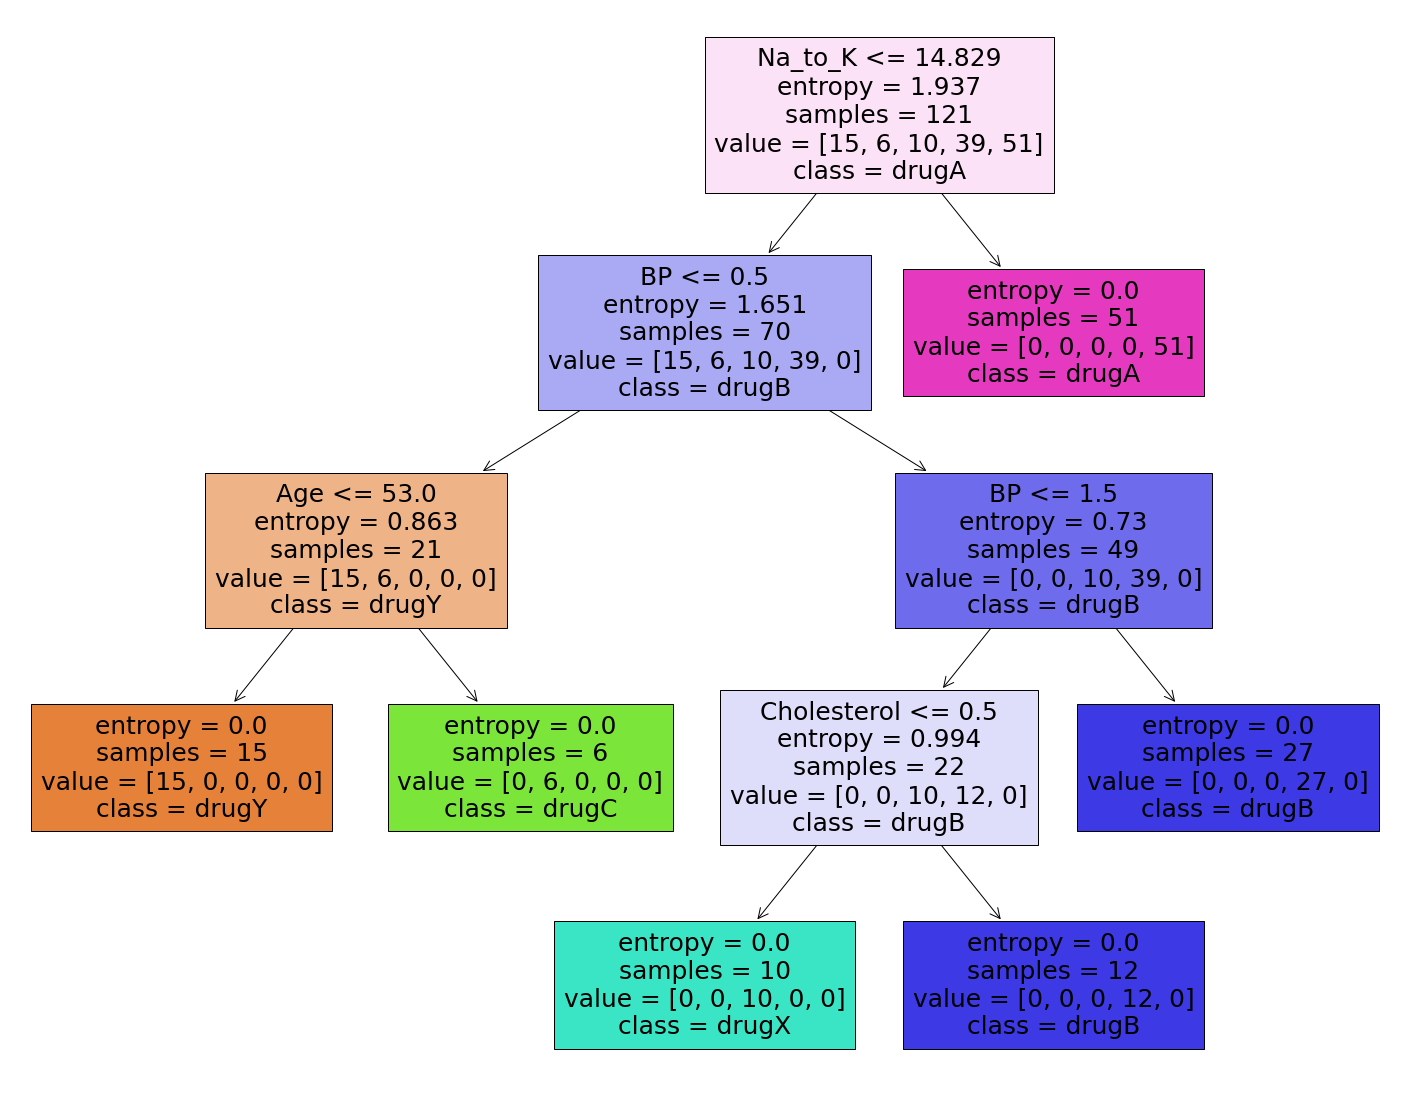

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drugtree,
                   feature_names=df.columns[0:5],
                   class_names=df.Drug.unique().tolist(),
                   filled=True)


Using another package to get high resolution and more insightful Decision Trees

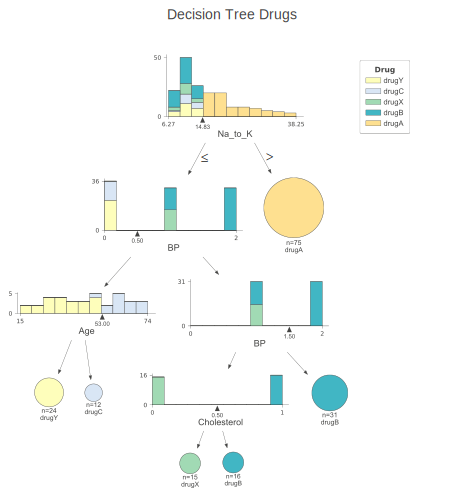

In [17]:
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(drugtree,
               x_data=X,
               y_data=y,
               target_name="Drug",
               feature_names=df.columns[0:5],
               class_names=df.Drug.unique().tolist(),
               title="Decision Tree Drugs")

viz